Descripción del proyecto:

La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Identificaré patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Los datos se remontan a 2016. Imaginemos que es diciembre de 2016 y estoy planeando una campaña para 2017.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización

In [1]:
# cargar librerías

from scipy import stats as st
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

## Cargar datos

In [3]:
games = pd.read_csv("/datasets/games.csv")

## Analisis exploratorio y procesamiento de datos

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
# creo un bucle for para cambiar los nombres de las columnas para evitar espacios y mayúsculas

new_col_names = []

for old_name in games.columns:
    
    name_stripped = old_name.strip()
    
    name_lowered = name_stripped.lower()
    
    new_col_names.append(name_lowered)
games.columns = new_col_names
print(games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [39]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
total_sales           0
dtype: int64

In [7]:
games['user_score'] = games['user_score'].replace('tbd', "NaN")
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [8]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
print (games)

                                name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  ot

## Conclusiones de los valores ausentes

A mi parecer los valores ausentes se encuentran por diferentes razones, los del nombre por algún error al corregir datos o algo por el estilo dado que solo eran 2. En cuanto a los puntajes de la crítica y del usuario además del rating supongo que no le dieron tanta importancia a esa información o no hubo tan buena respuesta del público por lo que no se dio una calificación como tal. En el aspecto de los géneros probablemente por no haber encontrado alguno en donde encajara y finalmente los valores ausentes en el año de lanzamiento puede ser por no tener una fecha clara y dejarlo sin fecha.

En el caso de el puntaje de usuario había una particularidad de 'tbd' en los datos que significa que aún no se determinaba dicho puntaje, esta información la cambié para usar los datos más adelante para graficar o analizarlos mejor.

In [9]:
oldgames = games[games['year_of_release'] < 1995]
midgames = games[(games['year_of_release'] >= 1995) & (games['year_of_release'] < 2009)]
newgames = games[games['year_of_release'] >= 2009]
og = oldgames['year_of_release'].count()
mg = midgames['year_of_release'].count()
ng = newgames['year_of_release'].count()
print (f'Los juegos del año 1980 al 2001 son: {og}, los juegos del año 2002 al 2008 son: {mg} y los juegos del año 2009 en adelante son: {ng}')

Los juegos del año 1980 al 2001 son: 488, los juegos del año 2002 al 2008 son: 9255 y los juegos del año 2009 en adelante son: 6703


In [10]:
games['platform'].nunique()

31

In [11]:
pivot_data1 = oldgames.pivot_table(index='platform',
                            columns='year_of_release',
                            values='total_sales',
                            aggfunc='sum')
print(pivot_data1)

year_of_release  1980.0  1981.0  1982.0  1983.0  1984.0  1985.0  1986.0  \
platform                                                                  
2600              11.38   35.68   28.88    5.84    0.27    0.45    0.67   
3DO                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
DS                  NaN     NaN     NaN     NaN     NaN    0.02     NaN   
GB                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GEN                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GG                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
NES                 NaN     NaN     NaN   10.96   50.08   53.44   36.41   
NG                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PC                  NaN     NaN     NaN     NaN     NaN    0.04     NaN   
PS                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
SAT                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
SCD                 NaN  

In [12]:
pivot_data2 = midgames.pivot_table(index='platform',
                            columns='year_of_release',
                            values='total_sales',
                            aggfunc='sum')
print(pivot_data2)

year_of_release  1995.0  1996.0  1997.0  1998.0  1999.0  2000.0  2001.0  \
platform                                                                  
3DO                0.08     NaN     NaN     NaN     NaN     NaN     NaN   
DC                  NaN     NaN     NaN    3.38    5.16    5.99    1.07   
DS                  NaN     NaN     NaN     NaN     NaN     NaN     NaN   
GB                 3.60   36.03    6.37   26.90   38.00   19.76    9.24   
GBA                 NaN     NaN     NaN     NaN     NaN    0.07   61.53   
GC                  NaN     NaN     NaN     NaN     NaN     NaN   26.34   
N64                 NaN   34.10   39.50   49.24   57.87   33.97    3.25   
NG                 0.33    0.10     NaN     NaN     NaN     NaN     NaN   
PC                 4.22   10.58   11.27    3.26    4.74    4.66    5.47   
PCFX                NaN    0.03     NaN     NaN     NaN     NaN     NaN   
PS                35.96   94.70  136.17  169.49  144.53   96.37   35.59   
PS2                 NaN  

In [13]:
pivot_data3 = newgames.pivot_table(index='platform',
                            columns='year_of_release',
                            values='total_sales',
                            aggfunc='sum')
print(pivot_data3)

year_of_release  2009.0  2010.0  2011.0  2012.0  2013.0  2014.0  2015.0  \
platform                                                                  
3DS                 NaN     NaN   63.20   51.36   56.57   43.76   27.78   
DS               119.54   85.02   26.18   11.01    1.54     NaN     NaN   
PC                16.91   24.28   35.03   23.22   12.38   13.28    8.52   
PS2               26.40    5.64    0.45     NaN     NaN     NaN     NaN   
PS3              130.93  142.17  156.78  107.36  113.25   47.76   16.82   
PS4                 NaN     NaN     NaN     NaN   25.99  100.00  118.90   
PSP               37.78   35.04   17.82    7.69    3.14    0.24    0.12   
PSV                 NaN     NaN    4.63   16.19   10.59   11.90    6.25   
Wii              206.97  127.95   59.65   21.71    8.59    3.75    1.14   
WiiU                NaN     NaN     NaN   17.56   21.65   22.03   16.35   
X360             120.29  170.03  143.84   99.74   88.58   34.74   11.96   
XOne                NaN  

# ¿Cuanto tardan las plataformas antiguas en desaparecer y nuevas en aparecer?
Las nuevas plataformas tardan entre 3 años o menos en aparecer cada que aparece una nueva, las plataformas antiguas varía mucho tardan entre 8 año a 12 años en desaparecer.

<AxesSubplot:xlabel='platform', ylabel='total sales'>

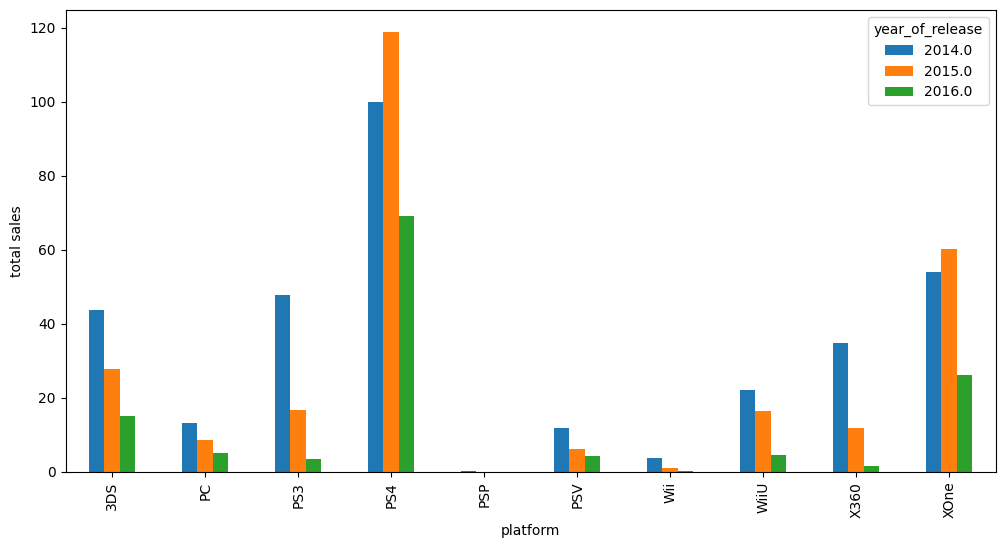

In [14]:
distgames = newgames[newgames['year_of_release'] > 2013]
pivot_data4 = distgames.pivot_table(index='platform',
                            columns='year_of_release',
                            values='total_sales',
                            aggfunc='sum')

pivot_data4.plot(kind= 'bar', ylabel= 'total sales', figsize=(12,6))

## ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Las plataformas líderes son PS4, XOne y 3DS. En general hubo una reducción en el año 2016, pero todos las demás plataformas se reducen. Creo que habrá que estudiar este caso particular para decir las plataformas en las cuales continuará siendo rentable, como el caso de la pc que a pesar de no tener muchas ventas es una plataforma que se mantiene activa.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

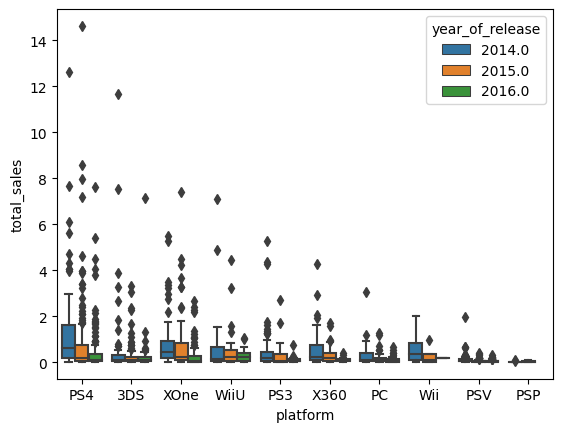

In [15]:
sns.boxplot(x= 'platform', y= 'total_sales', hue= 'year_of_release', data= distgames)


## Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

Al parecer son pocos los juegos que destacan en ventas que son los valores atípicos que se ven y por lo mismo suben los ventas promedio en varias plataformas.

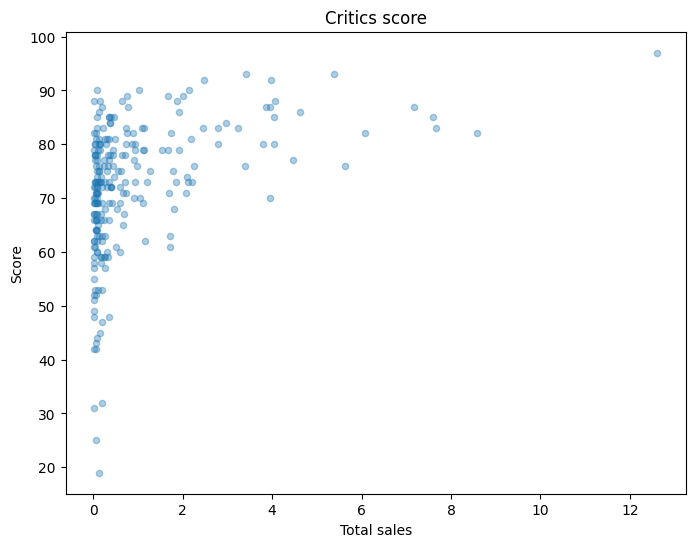

In [16]:
distgames[distgames['platform']== 'PS4'].plot(x= 'total_sales', y= 'critic_score', kind= 'scatter', alpha= 0.36,  title= 'Critics score', figsize= [8,6], xlabel= "Total sales", ylabel= "Score")

plt.show()

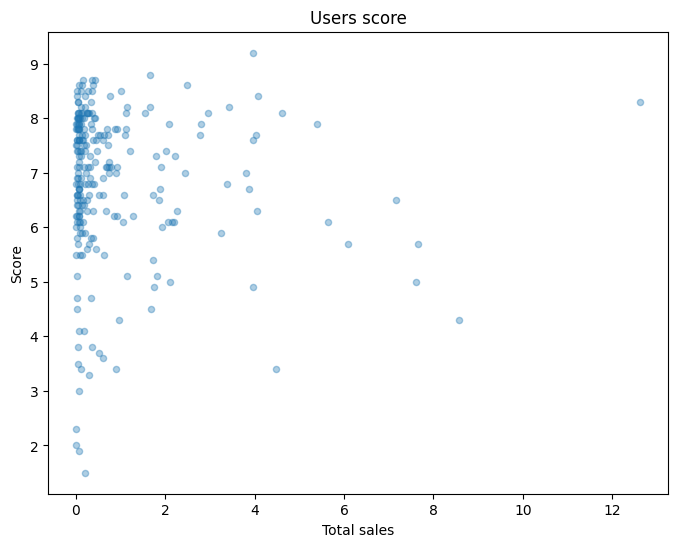

In [17]:
distgames[distgames['platform']== 'PS4'].plot(x= 'total_sales', y= 'user_score', kind= 'scatter', alpha= 0.36,  title= 'Users score', figsize= [8,6], xlabel= "Total sales", ylabel= "Score")

plt.show()

In [18]:
corr_cr = distgames['total_sales'].corr(distgames['critic_score'])
corr_us = distgames['total_sales'].corr(distgames['user_score'])
print (f'La correlación de ventas y calificación de la crítica es: {corr_cr}, \nLa correlación de ventas y calificación del usuario es: {corr_us}')

La correlación de ventas y calificación de la crítica es: 0.32810508696636304, 
La correlación de ventas y calificación del usuario es: -0.013070305002484562


## Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

Al tener una correlación positiva con la calificación de la crítica y las ventas puedo observar que basándose en la crítica por autoridad las ventas si tinen una correlación.
En el caso de la calificación de los usuarios tiene una correlación negativa cercana a cero por lo tanto no influye mucho la opinión del usuario al momento de una compra, esto en mi punto personal, puedo pensar que es por la subjetividad con la que los seres humanos solemos dar nuestra opinión además de que muchos basan una mala experiencia personal para dar una terrible calificación y por el contrario al tener una buena experiencia no influye tanto en dar una calificación tan alta como sería la calificación baja por la mala experiencia.

Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [19]:
distgames['name'].value_counts()

Lego Batman 3: Beyond Gotham                             8
LEGO Jurassic World                                      8
LEGO The Hobbit                                          8
The LEGO Movie Videogame                                 8
FIFA 15                                                  8
                                                        ..
Yokai Watch 3                                            1
TV Anime Idolm@ster: Cinderella Girls G4U! Pack Vol.1    1
One Piece: Super Grand Battle! X                         1
Card Fight!! Vanguard G: Stride to Victory!!             1
My Hero Academia: Battle for All                         1
Name: name, Length: 956, dtype: int64

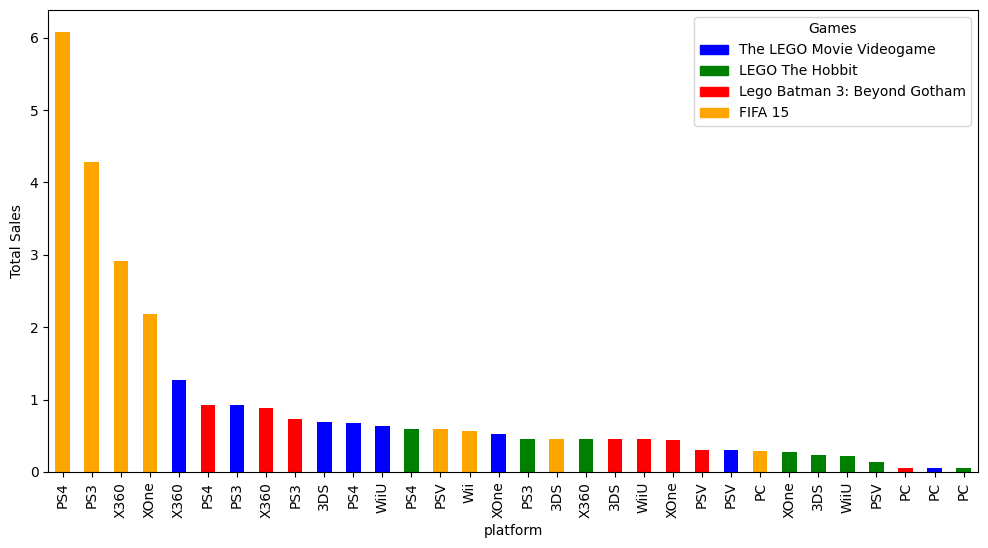

In [20]:
colores = {'The LEGO Movie Videogame': 'blue',
           'LEGO The Hobbit': 'green',
           'Lego Batman 3: Beyond Gotham': 'red',
           'FIFA 15': 'orange'}

lego = distgames[distgames['name'].isin(['The LEGO Movie Videogame', 'LEGO The Hobbit', 'Lego Batman 3: Beyond Gotham', 'FIFA 15'])]
ax = lego.plot(kind='bar', x='platform', y='total_sales', legend=True, ylabel='Total Sales', figsize=(12,6), color=lego['name'].map(colores))

handles = [plt.Rectangle((0,0),1,1, color=colores[label]) for label in colores]
ax.legend(handles, colores.keys(), title='Games', bbox_to_anchor=(1, 1))

plt.show()


## Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Los géneros más rentables son acción y tiro, los menos rentables son rompecabezas y estrategia. En cuanto a los últimos años me atrevería a generalizar los géneros con ventas altas y bajas.

<AxesSubplot:xlabel='genre', ylabel='total sales'>

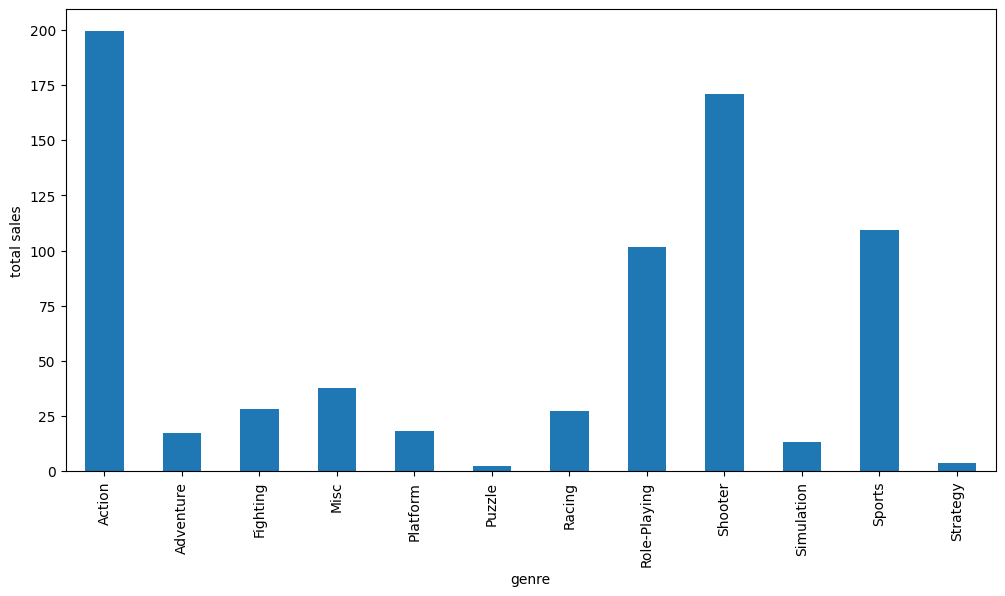

In [21]:
gen = distgames.groupby('genre')['total_sales'].sum()

gen.plot(kind='bar', x='genre', y='total_sales', ylabel='total sales', figsize=(12,6))

## Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
Los cinco géneros principales. Explica la diferencia.
Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

De na a eu en ventas es poca la variación de cuotas entre ellas, pero jp sí varía mucho más.
Viéndolo por separado me doy cuenta que en eu y na los géneros de tiro y acción son los principales, mientras que en jp son los juegos de roles y acción. Me imagino que la diferencia recae en que la sociedad de jp es una sociedad más reservada que busca expresarse por medio de los juegos de roles.
Creo que sí afectan las clasificaciones en jp por ser una sociedad conservadora, pero en eu y na va más hacia que hay una inclinación por la violencia y los juegos de tiro que hace que la clasificación m sea la más comprada.  y por qué.


In [22]:
na = distgames[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating']]
eu = distgames[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating']]
jp = distgames[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating']]

In [23]:
na_pl = na.groupby('platform')['na_sales'].sum()
na_pl_sorted = na_pl.sort_values(ascending=False)
na_pl_sorted.head()

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

In [24]:
eu_pl = eu.groupby('platform')['eu_sales'].sum()
eu_pl_sorted = eu_pl.sort_values(ascending=False)
eu_pl_sorted.head()

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

In [25]:
jp_pl = jp.groupby('platform')['jp_sales'].sum()
jp_pl_sorted = jp_pl.sort_values(ascending=False)
jp_pl_sorted.head()

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

In [26]:
na_pl_sorted[:5].sum()

252.87000000000023

In [27]:
eu_pl_sorted[:5].sum()

235.9200000000002

In [28]:
jp_pl_sorted[:5].sum()

92.3299999999999

In [29]:
na_pl = na.groupby('genre')['na_sales'].sum()
na_pl_sorted = na_pl.sort_values(ascending=False)
na_pl_sorted.head()

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

In [30]:
eu_pl = eu.groupby('genre')['eu_sales'].sum()
eu_pl_sorted = eu_pl.sort_values(ascending=False)
eu_pl_sorted.head()

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In [31]:
jp_pl = jp.groupby('genre')['jp_sales'].sum()
jp_pl_sorted = jp_pl.sort_values(ascending=False)
jp_pl_sorted.head()

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

In [32]:
#Everyone, Mature, Teen, Ev+10years

na_pl = na.groupby('rating')['na_sales'].sum()
na_pl_sorted = na_pl.sort_values(ascending=False)
na_pl_sorted.head()

rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

In [33]:
eu_pl = eu.groupby('rating')['eu_sales'].sum()
eu_pl_sorted = eu_pl.sort_values(ascending=False)
eu_pl_sorted.head()

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

In [34]:
jp_pl = jp.groupby('rating')['jp_sales'].sum()
jp_pl_sorted = jp_pl.sort_values(ascending=False)
jp_pl_sorted

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

In [35]:
distgames

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


## Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

Las hipótesis nulas las formulé basándome en las premisas que se buscan comprobar que son si el promedio de los usuarios para las plataformas Xbox One y PC son las mismas y si el promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Las hipótesis alternativas las formulé como lo contrario a las hipótesis nulas.

— Qué criterio utilizaste para probar las hipótesis y por qué.


Utilicé el ttest_ind porque son poblaciones independientes.

In [36]:
pc_plat = distgames[distgames['platform'] == 'PC']
pc_pla = pc_plat['user_score'].dropna()
xone_plat = distgames[distgames['platform'] == 'XOne']
xone_pla = xone_plat['user_score'].dropna()



alpha = 0.05 
print(st.levene (pc_pla, xone_pla, center = 'mean'))

results = st.ttest_ind(pc_pla, xone_pla, equal_var= False) 
print('valor p:', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

LeveneResult(statistic=8.247858938786841, pvalue=0.004386298510089398)
valor p: 0.11601398086668832
No podemos rechazar la hipótesis nula


In [37]:
distgames['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [38]:
sp_gen = distgames[distgames['genre'] == 'Sports']
sp_ge = sp_gen['user_score'].dropna()
ac_gen = distgames[distgames['genre'] == 'Action']
ac_ge = ac_gen['user_score'].dropna()

alpha = 0.05 
print(st.levene (sp_ge, ac_ge, center = 'mean'))
results = st.ttest_ind(sp_ge, ac_ge, equal_var= True) 
print('valor p:', results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

LeveneResult(statistic=25.153910151528862, pvalue=7.810758187558722e-07)
valor p: 2.8711147985105864e-19
Rechazamos la hipótesis nula


## Escribe una conclusión general


En general haciendo estas búsquedas y visualizaciones puedo entender y así también explicar a mi cliente o empleador los resultados que se han obtenido en los últimos años y así enfocarse en aumentar las ventas además de hacer predicciones de lo que se pude generar en el año siguiente.